1. 판다스 데이터 불러오기(또는 numpy)
2. 데이터 전처리
3. 신경망 구축

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('test_non21.csv', thousands = ',') # pandas 데이터 프레임으로 불러옴
# thousands 천단위 자리수 구분 , 없앰

# X = np.load('snake_x.npy')
# Y = np.load('snake_y.npy') # numpy로 받지만 상하좌우 하나일 텐데?

In [2]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical

In [4]:
x = df.iloc[:,0:8]      # iloc 는 숫자 통해 8번까지 슬라이싱, 0~ 4는 사과와의 상하좌우 거리, 5 ~ 7은 벽(몸통)과의 거리
y = df['ans']           # ans는 y, 상 0 하 1 좌 2 우 3
x_train = x[:3000]      # train 3000개 y 200개 
y_train = y[0:3000]
x_test =x[3000:3200]    
y_test =y[3000:3200]

In [5]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(200, 8)
(200,)
(3000, 8)
(3000,)


In [6]:
print(x_test.iloc[0])   # x_test 형식 확인

px1     3
px2     5
px3     5
px4     7
px5     5
px6     0
px7    10
px8     0
Name: 3000, dtype: int64


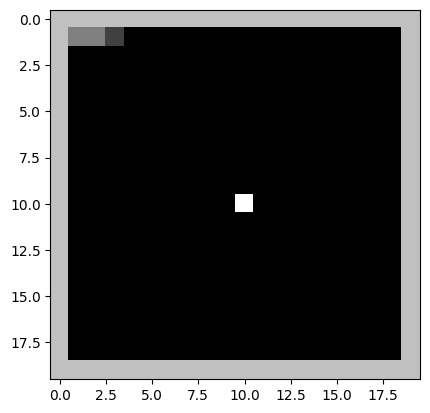

In [16]:
# x1 = x_train.iloc[0].values # pandas를 numpy로 변형
# x1 = x1.reshape(20,20)
# plt.imshow(x1, cmap='gray')
# 맵 데이터를 불러와 확인(현재 코드는 맵 데이터 불러오지 않음)

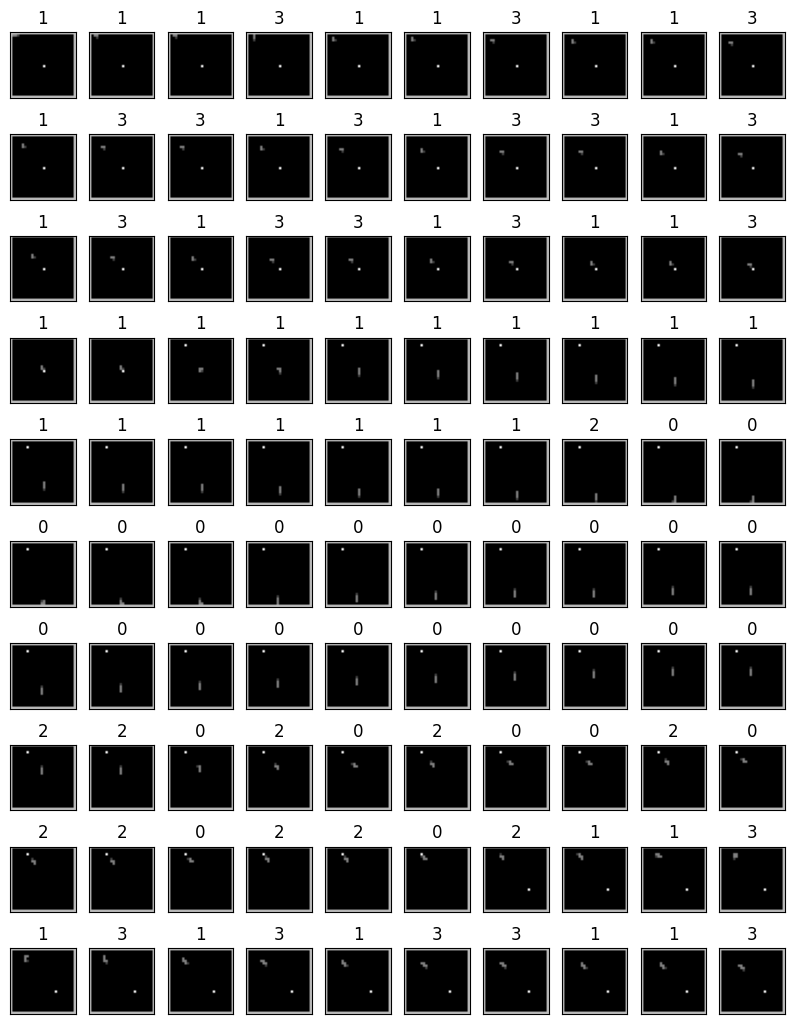

In [7]:

# fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 13),
#                          subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     x1 = x_train.iloc[i].values
#     x1 = x1.reshape(28,28)
#     ax.imshow(x1, cmap = 'gray')
#     ax.set_title(y_train[i])

# plt.show()

In [26]:
x_train = x_train.astype('float32') / 17    # 거리 최대 17로 정규화
y_train = to_categorical(y_train)           # 상하좌우 벡터로
x_test = x_test.astype('float32') / 17  
y_test = to_categorical(y_test) 

In [27]:
model = Sequential([
    Dense(64, input_dim=8, activation='relu'),  # 8 입력
    Dropout(0.2),                               # dropout 수치 0.2
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax') # 상하좌우
])

# sgd = tf.keras.optimizers.SGD(lr = 0.01, decay =0.0, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# 이건 분류임? 분류다


checkpoint_callback = ModelCheckpoint("best_model.h5",
                                      save_best_only=True,
                                      monitor="val_loss")

In [28]:
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=32,
                 epochs=300,
                 callbacks=[checkpoint_callback])

Epoch 1/300
75/75 [==============================] - 1s 8ms/step - loss: 1.3342 - accuracy: 0.3858 - val_loss: 1.2199 - val_accuracy: 0.5217
Epoch 2/300
75/75 [==============================] - 0s 5ms/step - loss: 1.1913 - accuracy: 0.4854 - val_loss: 1.0485 - val_accuracy: 0.5783
Epoch 3/300
75/75 [==============================] - 0s 5ms/step - loss: 1.0683 - accuracy: 0.5417 - val_loss: 0.9422 - val_accuracy: 0.5933
Epoch 4/300
75/75 [==============================] - 0s 6ms/step - loss: 0.9695 - accuracy: 0.5987 - val_loss: 0.8655 - val_accuracy: 0.6267
Epoch 5/300
75/75 [==============================] - 0s 7ms/step - loss: 0.9044 - accuracy: 0.6187 - val_loss: 0.7946 - val_accuracy: 0.6683
Epoch 6/300
75/75 [==============================] - 0s 6ms/step - loss: 0.8448 - accuracy: 0.6667 - val_loss: 0.7279 - val_accuracy: 0.7550
Epoch 7/300
75/75 [==============================] - 0s 6ms/step - loss: 0.7908 - accuracy: 0.6875 - val_loss: 0.6721 - val_accuracy: 0.7800
Epoch 8/300
7

In [7]:
print(x_test.shape)

(200, 8)


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('snake_non21_pred.csv', y_pred, fmt='%d')

7/7 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 1.0000
Test accuracy 1.0
Test loss 0.014420834369957447
7/7 [==============================] - 0s 3ms/step


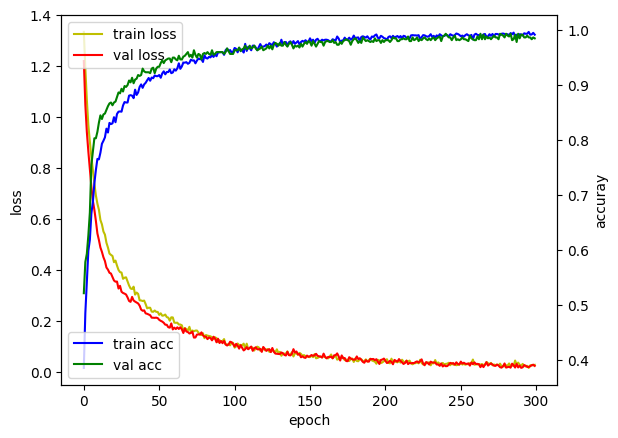

In [30]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
from keras.models import load_model
model.save('snake_model.h5')